In [ ]:
import graphviz as gv
import numpy as np
import pandas as pd
import heapq as hq
import numpy.random as npr
import matplotlib.pyplot as plt
import math
import csv

# **Mostrar grafo generado por algoritmo**

In [ ]:
def NodeShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout; g.edge_attr["color"] = "black"; g.node_attr["color"] = "blue"; g.node_attr["width"] = "0.1"; g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"; g.node_attr["fontcolor"] = "mediumslateblue" ;g.node_attr["fontname"] = "monospace" ; g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if(u == -1 or u == None): continue
    if u != None:
      if weighted:
        for vi, w in L[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

# **Funciones**

In [ ]:
def manhattan_distance(p1, p2):
  return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

In [ ]:
def get_node(coord, size):
  return int(coord[0] + size*coord[1])

In [ ]:
def get_cod(node, size):
  x = node % size
  y = (node - x)/size
  return (int(x), int(y))

In [ ]:
class Set_controller:
    def __init__(varbfs, n):
        varbfs.s = [-1]*n

    def find(varbfs, a):
        if varbfs.s[a] < 0:
            return a
        parent = varbfs.find(varbfs.s[a])
        varbfs.s[a] = parent
        return parent

    def sameset(varbfs, a, b):
        return varbfs.find(a) == varbfs.find(b)

    def union(varbfs, a, b):
        if varbfs.sameset(a, b):
            return
        a = varbfs.find(a)
        b = varbfs.find(b)
        if -varbfs.s[a] > -varbfs.s[b]:
            varbfs.s[a] += varbfs.s[b]
            varbfs.s[b] = a
        else:
            varbfs.s[b] += varbfs.s[a]
            varbfs.s[a] = b

In [ ]:
def Orden_par(G):
  n = len(G)
  edges = []
  for u in range(n):
    for v, w in G[u]:
      hq.heappush(edges, (w, u, v))
  uf = Set_controller(n)
  T = []
  while edges and n > 0:
    w, u, v = hq.heappop(edges)
    if not uf.sameset(u, v):
      uf.union(u, v)
      T.append((u, v, w))
      n -= 1
  return T

# **Grafo generado por Dataset**

In [ ]:
def create_city(size):
  G = [[] for _ in range(size**2)]
  final = False
  for i in range(size ** 2):
    if i % size == 0:
      G[i].append(i+1)
    elif (i + 1) % size == 0:
      G[i].append(i-1)
    else:
      G[i].append(i+1)
      G[i].append(i-1)
    if (size - 1)*size == i:
      final = True
    if not final:
      G[i].append(i+size)
      G[i + size].append(i)
  identificador = ["N" for _ in range(size**2)]
  return G, identificador

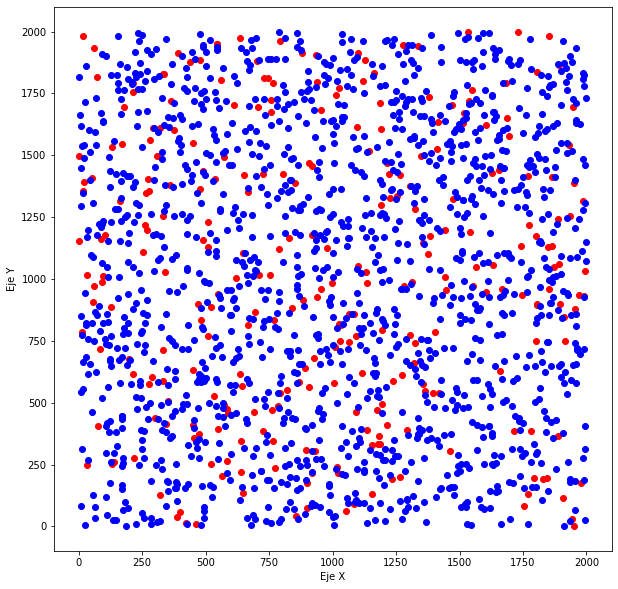

In [ ]:
n_town = 2500
G, identificador = create_city(n_town)
warehouses = pd.read_csv("almacenes.csv", header=None).to_numpy()
houses = pd.read_csv("puntos_entrega.csv", header=None).to_numpy()
plt.subplots(figsize=(10, 10))
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.scatter(warehouses[:, 0], warehouses[:, 1],color='red')
plt.scatter(houses[:, 0], houses[:, 1],color='blue')

In [ ]:
house_by_warehouse = len(houses) / len(warehouses)
aux_house = list(houses)
grupos = []
grupo = dict()
j= (int)(house_by_warehouse)
for warehouse in warehouses:
  
  aux_house.sort(key=lambda house: manhattan_distance(warehouse, house))
  grupo["casas"] = aux_house[:5]
  
  grupo["almacen"] = warehouse
  aux_house = aux_house[5:]
  grupos.append(grupo.copy())

# **Algoritmo con Prim - Miguel Angel Alfaro Gonzales**

In [ ]:
def prim(G):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n
  q = [(0, 0)]
  while q:
    _, u = hq.heappop(q)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v] and w < cost[v]:
          cost[v] = w
          path[v] = u
          hq.heappush(q, (w, v))

  return path, cost

In [ ]:
def structure_prim(grupo, plt=None, town=80):
  node = grupo["casas"]
  node.append(grupo["almacen"])
  label = list()
  for nodo in node:
    label.append(str(get_node(nodo, town)))
  grafo = [[] for _ in range(len(node))]
  for i, _ in enumerate(node):
    for j, _ in enumerate(node):
      if i == j: continue
      grafo[i].append((j, manhattan_distance(node[i], node[j])))
  path, cost = prim(grafo)
  if(plt == None): return NodeShow(grafo, weighted=True, path=path, labels=label)
  else: 
    for i in range(len(path)):
      nodefir = get_cod(int(label[i]), town)
      nodesec = get_cod(int(label[path[i]]), town)
      plt.plot([nodefir[0], nodesec[0]], [nodefir[1], nodesec[1]])

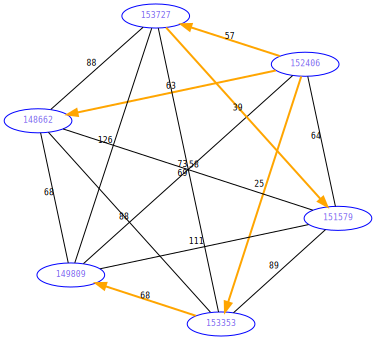

In [ ]:
structure_prim(grupos[6],None,80)

# **Algoritmo Dijkstra - Dino Iván Pérez Vásquez**

In [ ]:
def Dijkstra_diccionario(G,S):
  visited,path,cost = {},{},{}
  for i in G.keys():
    visited[i],path[i],cost[i] = False,None,math.inf

  cost[s] = 0
  Cola = [(0,S)]
  while len(Cola)>0:
    g_u,u = hp.heappop(Cola)
    if visited[u]:continue
    visited[u] = True
    for v in G[u]:
      f = g_u+1
      if cost[v]>f:
        cost[v] = f
        path[v] = u
        hp.heappush(Cola,(f,v))

  return path

In [ ]:
def structure_dijkstra(grupo, plt=None, town=80):
  node = grupo["casas"]
  node.append(grupo["almacen"])
  label = list()
  for nodo in node:
    label.append(str(get_node(nodo, town)))
  grafo = [[] for _ in range(len(node))]
  for i, _ in enumerate(node):
    for j, _ in enumerate(node):
      if i == j: continue
      grafo[i].append((j, manhattan_distance(node[i], node[j])))
  path, cost = dijkstra(grafo, len(node) - 1)
  if(plt == None): return NodeShow(grafo, weighted=True, path=path, labels=label)
  else: 
    for i in range(len(path)):
      nodefir = get_coord(int(label[i]), town)
      nodefsec = get_coord(int(label[path[i]]), town)
      plt.plot([nodefir[0], nodefsec[0]], [nodefir[1], nodefsec[1]])
      

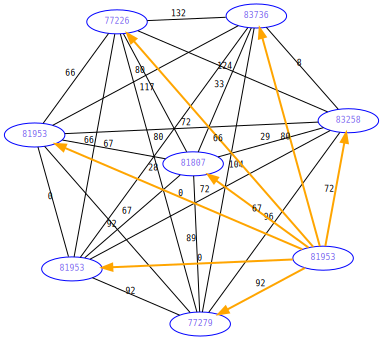

In [ ]:
structure_dijkstra(grupos[24])

# **Algoritmo BFS**

In [ ]:
def bfs(G, s):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  queue = [s]
  visited[s] = True

  while queue:
    u = queue.pop(0)
    for v in G[u]:
      if not visited[v]:
        visited[v] = True
        parent[v] = u
        queue.append(v)

  return parent

In [ ]:
def structure_bfs(grupo, plt=None, ntown=80):
  nodos = grupo["casas"]
  nodos.append(grupo["almacen"])
  label = list()
  for nodo in nodos:
    label.append(str(get_node(nodo, ntown)))
  label[-1] = str(get_node(nodo, ntown))
  grafo = [[] for _ in range(len(nodos))]
  for i, _ in enumerate(nodos):
    for j, _ in enumerate(nodos):
      if i == j: continue
      grafo[i].append((j, manhattan_distance(nodos[i], nodos[j])))
  T = Orden_par(grafo)
  n = len(grafo)
  Gp = [[] for _ in range(n)]
  for u, v, _ in T:
    Gp[u].append(v)
    Gp[v].append(u)
  path = bfs(Gp, 5)
  if(plt == None): return NodeShow(grafo, weighted=True, path=path, labels=label)
  else: 
    for i in range(len(path)):
      if path[i] == None: continue
      nodefir = get_cod(int(label[i]), ntown)
      nodesec = get_cod(int(label[path[i]]), ntown)
      plt.plot([nodefir[0], nodesec[0]], [nodefir[1], nodesec[1]])

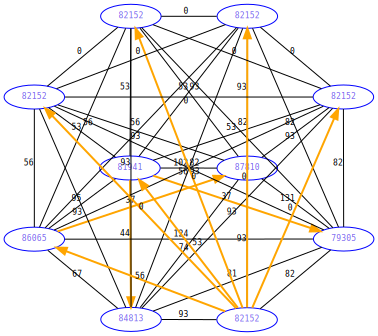

In [ ]:
structure_bfs(grupos[45],None,80)

# **Algoritmo Bellman Ford - Sebastian Alonso Gonzales Sotomayor**

In [ ]:
def bellmanFord(G, s):
  n = len(G)
  cost = [float('inf')]*n
  cost[s] = 0
  path = [-1]*n
  for _ in range(n-1):
    for u in range(n):
      for v, w in G[u]:
        if cost[u] + w < cost[v]:
          cost[v] = cost[u] + w
          path[v] = u
  for u in range(n):
    for v, w in G[u]:
      if cost[u] + w < cost[v]:
        return None, None
  return path, cost

In [ ]:
def structure_bellmanFord(grupo, plt=None, town=80):
  node = grupo["casas"]
  node.append(grupo["almacen"])
  label = list()
  for nodo in node:
    label.append(str(get_node(nodo, town)))
  grafo = [[] for _ in range(len(node))]
  for i, _ in enumerate(node):
    for j, _ in enumerate(node):
      if i == j: continue
      grafo[i].append((j, manhattan_distance(node[i], node[j])))
  path, cost = bellmanFord(grafo, len(node) - 1)
  if(plt == None): return NodeShow(grafo, weighted=True, path=path, labels=label)
  else: 
    for i in range(len(path)):
      nodefir = get_cod(int(label[i]), town)
      nodefsec = get_cod(int(label[path[i]]), town)
      plt.plot([nodefir[0], nodefsec[0]], [nodefir[1], nodefsec[1]])

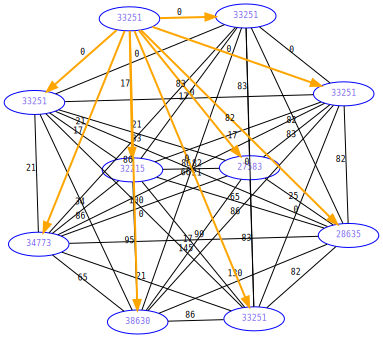

In [ ]:
structure_bellmanFord(grupos[10],None,80)

# **Solución al problema**

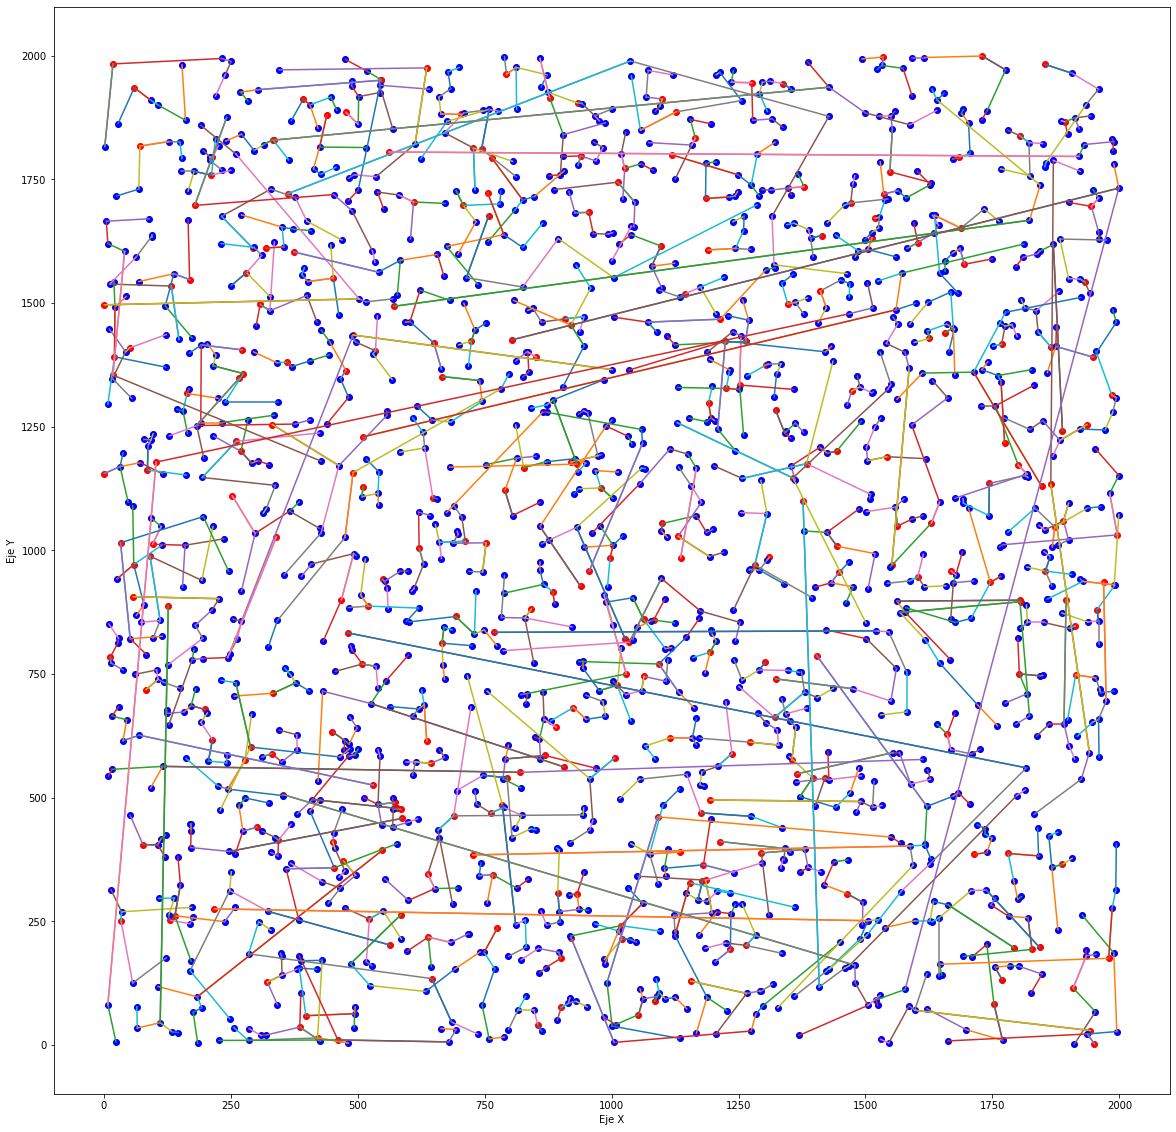

In [ ]:
plt.subplots(figsize=(20, 20))
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
for grupo in grupos:
  structure_prim(grupo, plt, n_town)
plt.scatter(warehouses[:, 0], warehouses[:, 1],color='red')
plt.scatter(houses[:, 0], houses[:, 1],color='blue')